# Lista 0

## zad 1

In [1]:
import numpy as np, matplotlib.pyplot as plt, seaborn
from scipy.stats import norm

In [8]:
n = 1000
mu =0
sigma2 = 4
sample = np.random.normal(mu, sigma2, n)

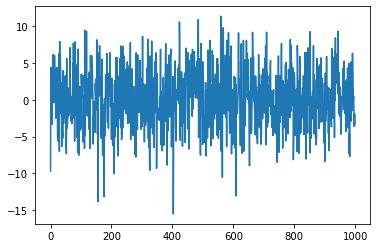

In [9]:
plt.plot(sample)

In [33]:
# u = np.random.uniform(size = n)
xs = np.linspace(min(sample),max(sample), 1000)

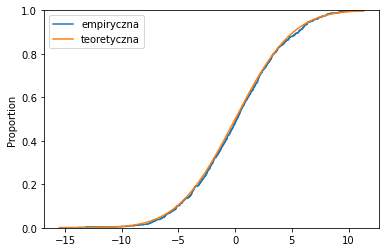

In [36]:
seaborn.ecdfplot(data = sample, label = 'empiryczna')
plt.plot(xs, norm.cdf(xs, mu, sigma2), label = 'teoretyczna')
plt.legend()

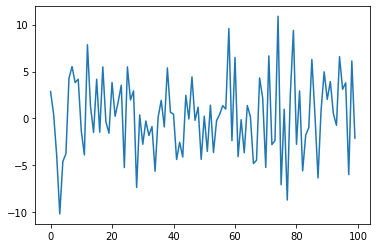

In [45]:
n2 = 100
sample2 = np.random.normal(mu, sigma2, n2)
plt.plot(sample2)
u = np.random.uniform(size = n2)
xss = np.linspace(min(sample2),max(sample2), 1000)


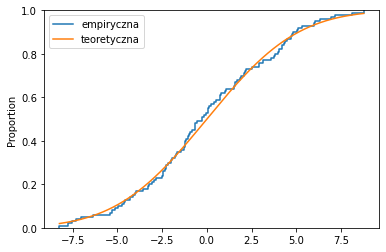

In [39]:
seaborn.ecdfplot(data = sample2, label = 'empiryczna')
plt.plot(xss, norm.cdf(xss, mu, sigma2), label = 'teoretyczna')
plt.legend()

Text(0.5, 1.0, 'gęstość dla n = 1000')

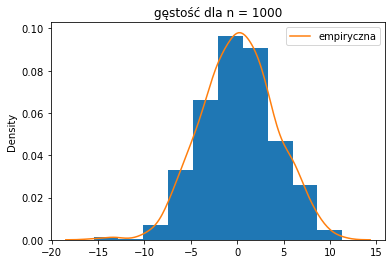

In [85]:
plt.hist(sample, density = True)
seaborn.kdeplot(data = sample, label = 'empiryczna')
plt.legend()
plt.title('gęstość dla n = 1000')

Text(0.5, 1.0, 'gęstość dla n = 100')

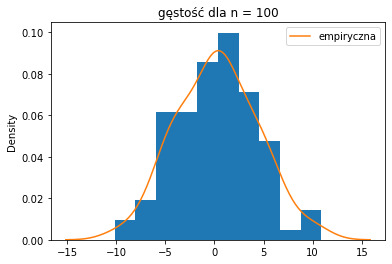

In [84]:
plt.hist(sample2, density = True)
seaborn.kdeplot(data = sample2, label = 'empiryczna')
plt.legend()
plt.title('gęstość dla n = 100')

In [48]:
def char_teo(t, X, mu, sigma2):
    return np.exp(mu*1j*t - sigma2*t**2/2)

In [49]:
def char_exp(n,t, X):
    return 1/n*sum(np.exp(1j*x*t) for x in X)

In [75]:
X = np.random.normal(mu, sigma2, n2)

In [76]:
T = np.linspace(-5,5,n2)
Tt = np.array([char_teo(t, X, mu, sigma2) for t in T])
Te = np.array([char_exp(n2, t, X) for t in T])

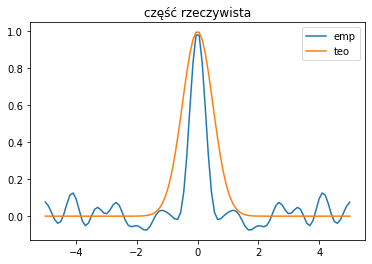

In [82]:
plt.plot(T, Te.real, label = 'emp')
plt.plot(T, Tt.real, label = 'teo')
plt.title('część rzeczywista')
plt.legend()

Text(0.5, 1.0, 'część urojona')

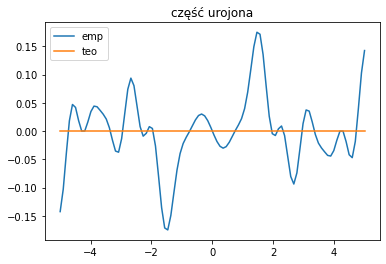

In [83]:
plt.plot(T, Te.imag, label = 'emp')
plt.plot(T, Tt.imag, label = 'teo')
plt.legend()
plt.title('część urojona')

## zadanie 2

In [2]:
MC = 200

In [21]:
def nw(T):
    return np.sqrt(sum(t**2 for t in T)/len(T))

def mm(T):
    return np.sqrt(np.pi/2)/len(T) * sum(t for t in T)

In [22]:
mi = 0
sigma = 1
n = [50, 100, 1000]
d1 = {}
d2 = {}
for k in range(MC):
    for i in n:
        X = np.random.normal(mi, sigma, int(i))
        Y = abs(X - mi)
        if i not in d1:
                d1[int(i)] = [nw(Y)]
        else:
            d2[int(i)].append(nw(Y))
        if i not in d2:
                d2[int(i)] = [mm(Y)]
        else:
            d2[int(i)].append(mm(Y))


{'whiskers': [<matplotlib.lines.Line2D at 0x2103178f350>,
 'caps': [<matplotlib.lines.Line2D at 0x210317986d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2103178e990>,
 'medians': [<matplotlib.lines.Line2D at 0x21031799750>,
 'fliers': [<matplotlib.lines.Line2D at 0x21031799f90>,
 'means': []}

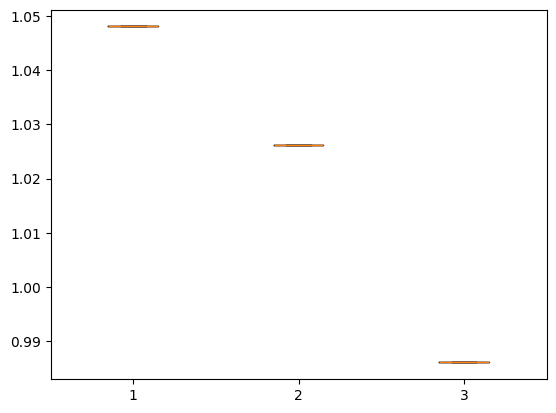

In [23]:
plt.boxplot(d1.values())

{'whiskers': [<matplotlib.lines.Line2D at 0x21031709dd0>,
 'caps': [<matplotlib.lines.Line2D at 0x2103170b010>,
 'boxes': [<matplotlib.lines.Line2D at 0x21031709450>,
 'medians': [<matplotlib.lines.Line2D at 0x2103170bdd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x21031718690>,
 'means': []}

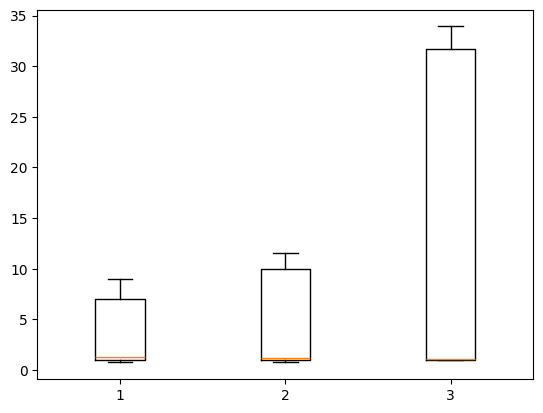

In [20]:
plt.boxplot(d2.values())